# **Homework II**
##### Grupo 41
##### Raquel Rodrigues (ist1106322) e Leonor Figueira (ist1106157)

## II. Pogramming

#### Pergunta 1)
#### a.

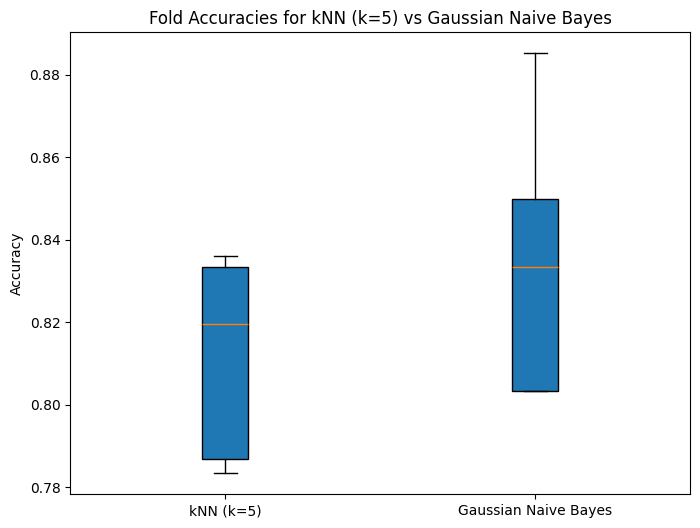

In [4]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Loading the dataset
df = pd.read_csv('heart-disease.csv')

# Separating features from target
X = df.drop(columns='target')
y = df['target']

# Initialize stratified 5-fold cross-validation with shuffling
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Initialize k-Nearest Neighbors classifier with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Gaussian Naïve Bayes model
nb = GaussianNB()

# Standardize the features (important for kNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lists to store accuracy scores for each model
knn_accuracies = []
nb_accuracies = []

# Iterate per fold
for train_k, test_k in folds.split(X, y):

    # Split the data into training and test sets
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
    # Scale the data for the knn
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit the models
    knn.fit(X_train_scaled, y_train)
    nb.fit(X_train, y_train)

    # Store accuracies
    knn_accuracy = knn.score(X_test_scaled, y_test)
    knn_accuracies.append(knn_accuracy)
    
    nb_accuracy = nb.score(X_test, y_test)
    nb_accuracies.append(nb_accuracy)



# kNN model
#knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(X, y)


#nb.fit(X, y)

# Cross-validation for each model
#knn_scores = cross_val_score(knn, X, y, cv=strat_kfold, scoring='accuracy')
#nb_scores = cross_val_score(nb, X, y, cv=strat_kfold, scoring='accuracy')

# Plotting boxplots with the fold accuracies
plt.figure(figsize=(8, 6))
plt.boxplot([knn_accuracies, nb_accuracies], labels=['kNN (k=5)', 'Gaussian Naive Bayes'], patch_artist=True)
plt.title('Fold Accuracies for kNN (k=5) vs Gaussian Naive Bayes')
plt.ylabel('Accuracy')
plt.show()

#### b.

#### c.

De modo a verificar se o modelo de KNN é estatisticamente superior ao modelo de naïve Bayes, foi realizado um teste
de hipóteses:

- Hipótese H0: kNN accuracy = NB accuracy
- Hipótese H1: kNN accuracy > NB accuracy

In [7]:
from scipy import stats

res = stats.ttest_rel(knn_accuracies, nb_accuracies, alternative='greater')
print("p-value=",res.pvalue)

p-value= 0.9330694505638637


Com base neste valor de p-value, aproximadamente 0.933, não se pode rejeitar a hipótese nula para níveis de significância 1%, 5% e 10%.

Isto significa que não há uma grande diferença estatística entre a exatidão dos modelos, e não podemos afirmar que a afirmação "𝑘NN is statistically superior to Naïve Bayes regarding accuracy” é verdadeira. 

#### Pergunta 2)
#### a.

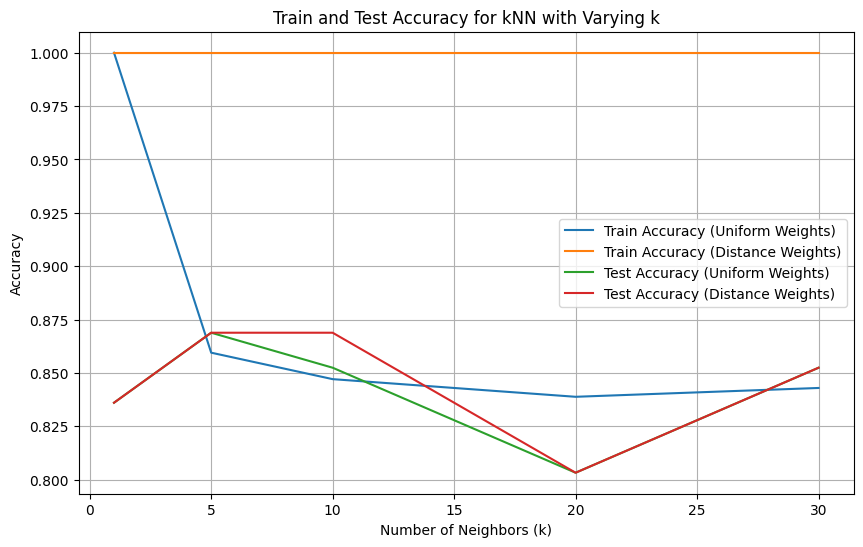

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Loading the dataset
df = pd.read_csv('heart-disease.csv')

# Separating features from target
X = df.drop(columns='target')
y = df['target']

# Stratified 80-20 training-testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Scale the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [1, 5, 10, 20, 30]

train_accs_uniform = []
test_accs_uniform = []
train_accs_distance = []
test_accs_distance = []

for k in k_values:
    # Uniform weights
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train_scaled, y_train)
    
    train_pred_uniform = knn_uniform.predict(X_train_scaled)
    test_pred_uniform = knn_uniform.predict(X_test_scaled)
    
    train_accs_uniform.append(accuracy_score(y_train, train_pred_uniform))
    test_accs_uniform.append(accuracy_score(y_test, test_pred_uniform))


    # Distance weights
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train_scaled, y_train)

    train_pred_distance = knn_distance.predict(X_train_scaled)
    test_pred_distance = knn_distance.predict(X_test_scaled)

    train_accs_distance.append(accuracy_score(y_train, train_pred_distance))
    test_accs_distance.append(accuracy_score(y_test, test_pred_distance))


# Plot the train an test accuracies for each model
plt.figure(figsize=(10, 6))

# Train accuracy
plt.plot(k_values, train_accs_uniform, label='Train Accuracy (Uniform Weights)', marker='o')
plt.plot(k_values, train_accs_distance, label='Train Accuracy (Distance Weights)', marker='o')

# Test accuracy
plt.plot(k_values, test_accs_uniform, label='Test Accuracy (Uniform Weights)', marker='o', linestyle='--')
plt.plot(k_values, test_accs_distance, label='Test Accuracy (Distance Weights)', marker='o', linestyle='--')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for kNN with Varying k')
plt.legend()
plt.grid(True)
plt.show()

#### b.
...

#### Pergunta 3)
...

Considerando as propriedades dos dados do ficheiro "heart-disease.csv", estas podem dificultar a utilização do modelo
de Naïve Bayes. primeiramente, este modelo assume que todas as variáveis são condicionalmente independentes. Porém, muitas das variáveis presentes nos dados são, muito provavelmente, relacionadas entre si. Variáveis como a "age" podem influenciar os valores das variáveis: "trestbps" (pressão arterial); "chol" (níveis de colestrol); "fbs" (níveis de açúcar no sangue); "restecg" (resultados do eletrocardiograma), "thalach" (máximo batimento cardíaco); "Thalassemia" (distúrbio sanguíneo); "ca" (número de vasos coronários principais ). "chol" e "Trestbps" também podem estar relacionados, assim como "Chol" e "Fbs", entre outros.
Adicionalmente, o modelo, para variáveis contínuas, muito frequentemente assume a distribuição Gaussiana para as mesmas. Porém, se as variáveis não seguirem uma distribuição Gaussiana, os valores das probabilidades podem não ser os mais corretos. A idade, os níveis de colestrol e o máximo batimento cardíaco são exemplos de variáveis contínuas dos dados que possivelmente poderão correr este risco.